<a href="https://colab.research.google.com/github/Jihyun13579/ESAA/blob/main/0911(%EC%9B%94)_%EA%B3%BC%EC%A0%9C_%ED%95%B8%EC%A6%88%EC%98%A8_4%EC%9E%A5_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8_p_157_202_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0911(월) 과제_핸즈온 4장 모델 훈련 p.157-202 필사
### 2129014 박지현

# 핸즈온 Chapter 4. 모델 훈련
- 모델이 어떻게 작동한느지 잘 이해하고 있으면 적절한 모델, 올바른 훈련 알고리즘, 작업에 맞는 좋은 하이퍼 파라미터 찾기 / 디버깅, 에러 효율적으로 분석하는 데 도움이 됨

## 4.1. 선형회귀

- 모델을 훈련시키는 두 가지 방법
 - 직접 계산할 수 있는 공식 사용 : 훈련 세트에 가장 잘 맞는 모델 파라미터=훈련 세트에 대해 비용 함수를 최소화하는 모델 파라미터 해석적으로 구하기
 - 경사하강법(GD)=반복적인 최적화 방식 사용 : 모델 파라미터 조금씩 바꾸면서 비용함수 훈련 세트에 대해 최소화시킴 + 배치 경사 하강법, 미니배치 경사 하강법, 확률적 경사 하강법(SGD)

- (1장) 삶의 만족도에 대한 간단한 선형 회귀 모델
 - 삶의 만족도 = Θ0 + Θ1 * 1인당_GDP
 - 입력 특성 1인당_GDP에 대한 선형 함수
 - Θ0, Θ1 : 모델 파라미터


- 선형 모델 : 입력 특성의 가중치 합 + 편향(bias, =절편, intercept)
 - y^(예측값) = Θ0 + Θ1*x1 + + Θ2*x2 + ... + + Θn*xn (n: 특성의 수)
  hΘ(x) = Θ*x
 - x: 특성값 / Θ: 모델 파라미터 / Θ0: 편향

 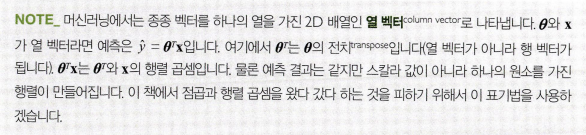

- 모델 훈련 : 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것
 - 먼저, 모델이 훈련 데이터에 얼마나 잘 들어맞는지 측정해야 함
 - 회귀의 널리 사용되는 성능 측정 지표 : 평군 제곱근 오차(RMSE) > RMSE를 최소화하는 = MSE 최소화하는 Θ 찾기
 - MSE의 식(=MSE(Θ))
 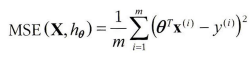

### 4.1.1. 정규방정식
정규방정식(normal equation): 비용함수를 최소화하는 Θ값을 찾기 위한 수학 공식
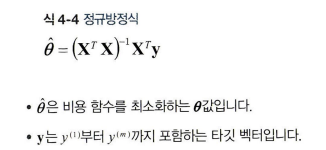


1. 정규방정식을 테스트하기 위해 선형처럼 보이는 데이터 생성하기 + 생성된 데이터 시각화

In [10]:
import numpy as np

X = 2* np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

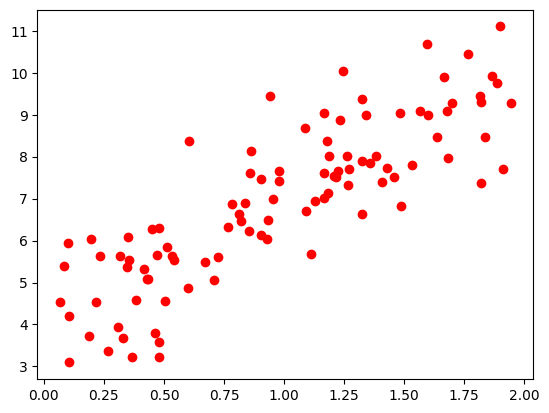

In [11]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'ro')

2. 정규방정식을 사용해 Θ^ 계산하기
 - np.linalg.inv()함수 사용해 역행렬 계산하기
 - dot() 메서드를 사용해 행렬 곱셈하기

In [12]:
X_b = np.c_[np.ones((100,1)), X]   # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

2-1. 정규 방정식으로 계산한 값을 확인하기

결과 : 'y=4+3x+가우시안 잡음' 생성함수와 매우 비슷한, 그러나 잡음 때문에 원래 함수의 파라미터를 정확하게 재현하지 못한 파라미터 확인 가능

In [13]:
theta_best

array([[4.02361015],
       [2.97706104]])

3. Θ^을 사용해 예측하기

In [14]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]   # 모든 샘플에 x0=1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.02361015],
       [9.97773224]])

4. 모델의 예측을 그래프에 나타내보기

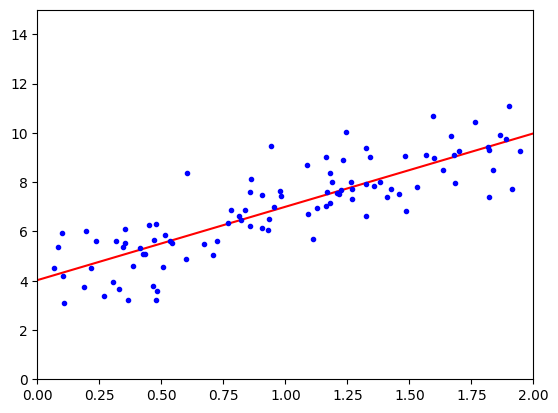

In [15]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

1. 사이킷런에서 선형 회귀를 수행하기

In [16]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [17]:
lin_reg.intercept_, lin_reg.coef_

(array([4.02361015]), array([[2.97706104]]))

In [18]:
lin_reg.predict(X_new)

array([[4.02361015],
       [9.97773224]])

2. LinearRegression 클래스의 기반인 scipy.linalg.lstsq() 함수(최소제곱) 직접 호출해보기
: Θ^ = X+y 계산함 (X+ : X의 유사역행렬=무어-펜로즈 역행렬)

In [19]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.02361015],
       [2.97706104]])

3. np.linalg.pinv() 함수 사용해 유사역행렬 X+ 직접 구해보기

In [20]:
np.linalg.pinv(X_b).dot(y)

array([[4.02361015],
       [2.97706104]])

유사역행렬: **특잇값 분해(SVD)** 표준 행렬 분해 기법 사용해 계산됨
 - SVD : 훈련 세트 행렬 X를 3개의 행렬 곱셈 UΣV^T로 분해함
 - 유사역행렬 X+=VΣ+U^T 로 계산됨
 - Σ+ : Σ 구한 후, 그 다음 어떤 낮은 임곅삾보다 작은 모든 수를 0으로 바꿈 > 0이 아닌 모든 값을 역수로 치환 > 마지막으로 만들어진 행렬을 전치함
 - 정규방정식을 계산하는 것보다 이 방식이 훨씬 효율적 + 극단적인 경우도 처리 가능
 - m<n or 어떤 특성이 중복되어 행렬 X^T*X의 역행렬이 없다면 작동하지 않는 정규방정식 대신, 유사역행렬은 항상 구할 수 O

### 4.1.2. 계산 복잡도

정규방정식 : (n+1) * (n+1) 크기가 되는 X^T*X의 역행렬을 계산
- 계산 복잡도 : 일반적으로 O(n^2.4)~O(n^3) > 특성 수가 2배 증가 시 계산 시간 대략 2^2.4=5.3에서 2^3=8배로 증가

- 사이킷런의 LinearRegression 클래스가 사용하는 SVD 방법 약 O(n^2)
- 정규방정식 등 다른 알고리즘으로 학습된 선형 호귀 모델 : 예측 매우 빠름 + 예측 계산 복잡도 : 샘플 수와 특성 수에 선형적

## 4.2. 경사 하강법(GD)
: 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것(기본 아이디어)

- 원리: 파라미터 벡터 Θ에 대해 비용 함수의 현재 그레이디언트(gradient)를 계산 > 그레이디언트가 감소하는 방향으로 진행 > 그레이디언트가 0이 되면 최솟값에 도달한 것!
- 특성이 매우 많고 훈련 샘플이 너무 많아 메모리에 모두 담을 수 없을 때 적합함
- 무작위 초기화 : Θ를 임의의 값으로 시작 > 조금씩 MSE 등 비용 함수가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상시킴

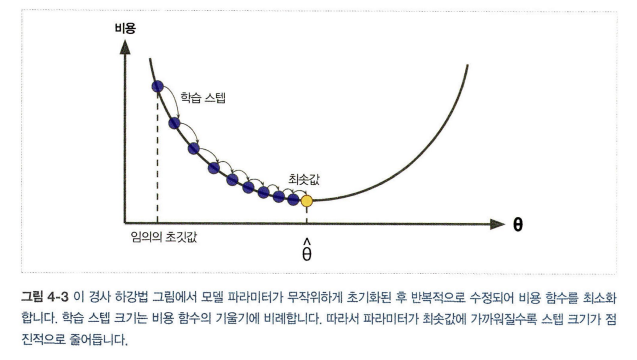

- 스텝의 크기 : 학습률 하이퍼파라미터로 결정됨
 - 너무 작을 시 : 반복 많이 수행 > 시간 많이 걸림 / 너무 클 시 : 골짜기 가로질러 이전보다 더 높은 곳으로 올라가게 될 수도 있음 > 더 큰 값으로 발산하게 만들어 적절한 해법 지나칠 수 있음
 - 전역 최솟값이 아닌 지역 최솟값에 수렴할 가능성 존재
 - 파라미터 공간 : 모델이 가진 파라미터 많음> 파라미터 공간의 차원 커짐> 비용함수 최소화하는 모델 파라미터 조합의 검색 더 어려워짐
 - 선형 회귀의 비용 함수 : 볼록함수 > 연속된 함수, 기울기 갑자기 변하지 X, 지역 최솟값 존재 X, 하나의 전역 최솟값만 존재 > 전쳑 최솟값에 가깝게 접근 가능

### 4.2.1. 배치 경사 하강법
: 매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해 계산하는 것
 - 매 스텝에서 훈련 데이터 전체를 사용
 - 편도함수 : Θj가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산하는 함수

1. 경사 하강법의 알고리즘 구현해보기

In [27]:
eta = 0.1   # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)   # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

1-2. 계산된 theta 확인해보기

결과 : 정규방정식으로 찾은 것과 같음

In [28]:
theta

array([[4.02361015],
       [2.97706104]])

2. 학습률 바꾸어 경사하강법 알고리즘 적용해보기

2-1. 3가지 다른 학습률 사용하여 진행한 경사 하강법의 스텝 처음 10개 보여줌(점선 :시작점 나타냄)

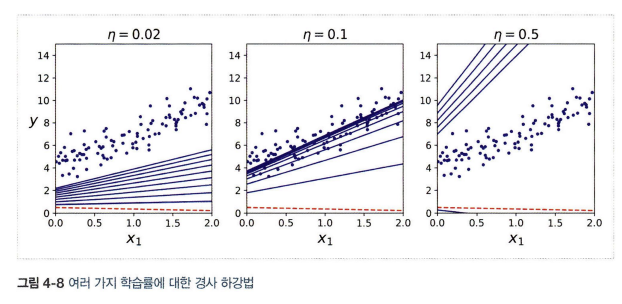

- 적절한 학습률 값으려면 그리드 탐색 사용해야 함
 - 그리드 탐색에서 수렴하는 데 너무 오래 걸리는 모델 막기 위해 반복 횟수 제한해야 함
 - 반복 횟수 지정 방법 : 반복 획수를 아주 크게 지정하고 그레이디언트 벡터가 아주 작아지면, 즉 벡터의 노름이 어떤 값 ε(허용오차)보다 작아지면 경사 하강법 거의 최솟값에 도달한 것이므로 알고리즘 중지하는 것

### 4.2.2. 확률적 경사 하강법
: 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트 계산하는 방법

- 일반적으로 한 반복에서 m번 되풀이되고, 이때의 각 반복 : 에포크=epoch



1. 간단한 학습 스케줄 사용한 확률적 경사 하강법 구현하기

In [29]:
n_epochs = 50
t0, t1 = 5, 50   # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t+ t1)

theta = np.random.randn(2,1)   # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2* xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m +i)
        theta = theta - eta * gradients

In [30]:
theta

array([[4.00480632],
       [2.98809372]])

2. 최대 1000번 에포크 동안 실행(max_iter=1000) or 한 에포크에서 0.001보다 적게 손실이 줄어들 때까지 실행됨(tol=1e-3)
 - 학습률 ets0 = 0.1 사용
 - 규제 전혀 사용하지 않음(penalty=None)

In [31]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

결과 : 정규 방정식으로 구한 것과 매우 비슷한 값 얻음

In [38]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.04046468]), array([3.00697414]))

### 4.2.3. 미니배치 경사 하강법

## 4.3. 다항 회귀

In [39]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 *X**2 + X + 2 + np.random.rand(m,1)

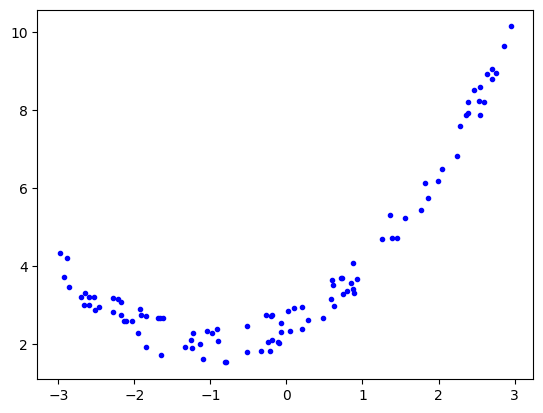

In [41]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'b.')

In [48]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.60341107])

In [49]:
X_poly[0]

array([-2.60341107,  6.77774921])

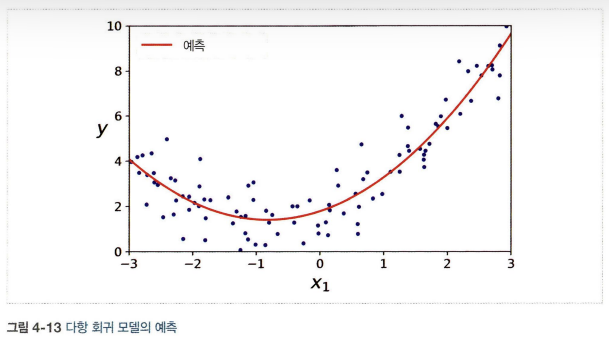

## 4.4. 학습 곡선
: 데이터에 과대적합 또는 과소적합되었는지 알기 위해, 즉 모델이 너무 단순하거나 너무 복잡한지 알기 위해 '학습 곡선' 그려보기



1. 훈련 세트와 검증 세트의 모델 서른을 훈련 세트 크기의 함수로 나타낸 그래프 생성하기
 - 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델 여러 번 훈련시켜 그래프 생성하기
 - 주어진 코드 : 주어진 훈련 데이터에서 모델의 학습 곡선 그리는 함수 정의하기

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련 세트")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")

2. 단순 선형 회귀 모델(직선)의 학습 곡선 살펴보기

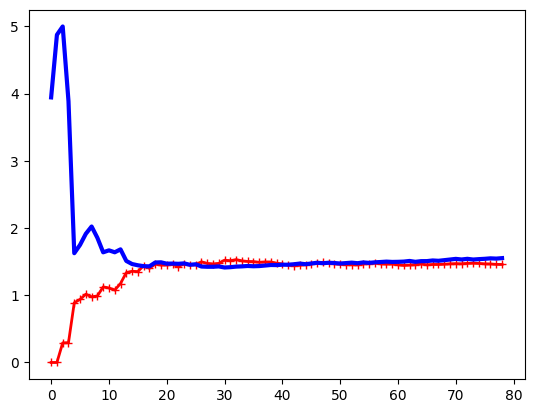

In [56]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

3. 같은 데이터에서 10차 다항 회귀 모델의 학습 곡선 그려보기

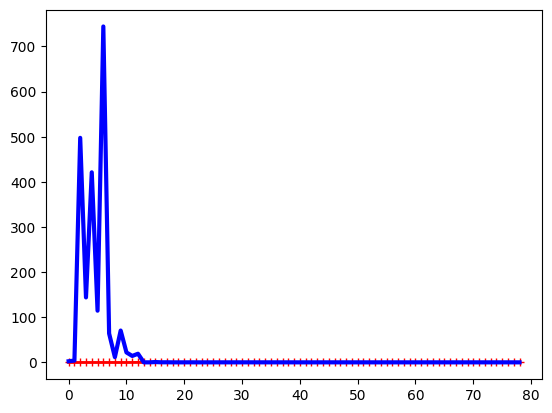

In [57]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)

- 두 학습 곡선의 2가지 중요한 차이점
 - 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮음
 - 두 곡선 사이의 공간 존재 > 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다 > 과대적합의 모델의 특징 / 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워짐

**편향/분산 트레이드오프**
 - 모델의 복잡도가 커지면 통상적으로 분산이 늘어나고 편향은 줄어듬
 - 모델의 복잡도가 줄어들면 편향이 커지고 분산은 작아짐

## 4.5. 규제가 있는 선형 모델
과대적합을 감소시키는 좋은 방법 : 모델을 규제하는 것
- 자유도 줄이면 데이터에 과대적합되기 더 어려워짐
- 다항 회귀 모델의 규제 : 다항식의 차수를 감소시키는 것
- 선형 회귀 모델 : 보통 모델의 가중치를 제한함으로써 규제를 가함

### 4.5.1. 릿지 회귀
: 규제가 추가된 선형 회귀 버전
- 규제항 aΣθi^2이 비용 함수에 추가됨

1. 사이킷런에서 정규방정식을 사용한 릿지 회귀를 적용하는 회귀 살펴보기

In [60]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.4924449]])

1-2. 확률적 경사 하강법을 사용했을 때의 결과

In [61]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.46892556])

### 4.5.2. 라쏘 회귀
: 릿지 회귀처럼 비용 함수에 규제항을 더하지만, 규제항에 가중치 벡터의 l1 노름을 사용함

1. Lasso 클래스를 사용한 간단한 사이킷런 예제
- Lasso 대신 SGDRegressor(penalty="l1")도 사용 가능

In [62]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.4448296])

### 4.5.3. 엘라스틱넷
: 릿지 회귀와 라쏘 회귀를 절충한 모델
- 규제항 : 릿지와 회귀의 규제항을 단순히 더해서 사용, 혼합 정도는 r을 사용해 조절함
- r=0:릿지 회귀 / r=1:라쏘 회귀

1. 사이킷런의 ElasticNet을 사용한 간단한 예제 살펴보기(l1_ratio = 혼합 비율 r)

In [63]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.44659267])

### 4.5.4. 조기 종료
: 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 방식



1. 조기 종료를 위한 기본적인 구현 코드

In [70]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# 데이터 준비
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, warm_start=True,
                       penalty=None, learning_rate="constant",eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) #훈련을 이어서 진행합니다.
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)

    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/loc

- warm_start=True로 지정 시: fit() 메서드가 호출될 때 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련 이어갈 수 있음

## 4.6. 로지스틱 회귀
어떤 뢰귀 알고리즘은 분류에도 사용할 수 있음


**로지스틱 회귀** : 샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 사용됨
 - 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측함

### 4.6.1. 확률 추정
로지스틱 회귀 모델 : 입력 특성의 가중치 합을 계산함, but 선형 회귀처럼 바로 결과를 출력하지 않고 결괏값의 로지스틱을 출력한다.
- 로지스틱 : 0과 1 사이의 값을 출력하는 시그모이드 함수(즉, S자 형태)

### 4.6.2. 훈련과 비용 함수

### 4.6.3. 결정 경계

로지스틱 회귀 설명하기 위해 붓꽃 데이터셋 사용하기
- 붓꽃 데이터셋 : 3개의 품종에 속하는 150개의 꽃잎과 꽃받침의 너비와 길이를 담고 있는 데이터셋

- 꽃잎의 너비를 기반으로 Iris-B=Versicolor 종을 감지하는 분류기 생성하기

1. 데이터 로드하기

In [71]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [75]:
X = iris['data'][:,3:]
y = (iris['target']==2).astype(np.int)   # 1 Iris-Virginica면 1, 그렇지 않으면 0

<ipython-input-75-494907a6bbed>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris['target']==2).astype(np.int)   # 1 Iris-Virginica면 1, 그렇지 않으면 0


2. 로지스틱 회귀 모델 훈련시키기

In [77]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

3. 꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률을 계산해보기

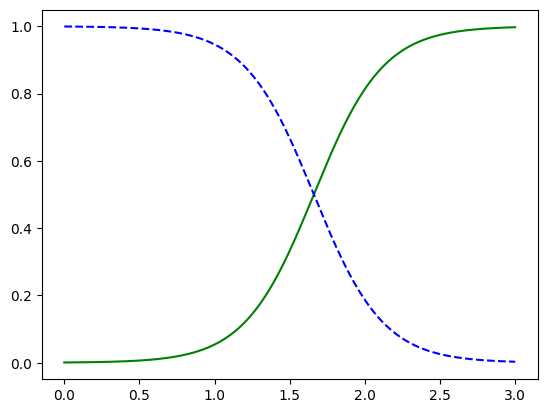

In [78]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
#다음은 이미지를 미려하게 출력하기 위한 맷플롯립 코드가 이어집니다.

4. predict() 메서드 사용해서 가장 가능성 높은 클래스를 반환해보기

In [79]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

5. 꽃잎 너비와 꽃잎 길이 2개의 특성을 기반으로 하여 새로운 꽃이 Iris-Verginica인지 확률 추정 가능
- 점선 : 모델이 50% 확률을 추정하는 지점, 모델의 결정 경계

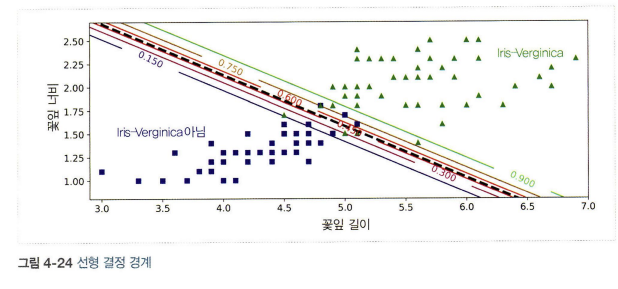

### 4.6.4. 소프트맥스 회귀
소프트맥스 회귀 = 다항 로지스틱 회귀 : 여러 개의 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화될 수 있음

In [80]:
X = iris["data"][:, (2,3)]   # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [81]:
softmax_reg.predict([[5,2]])

array([2])

In [82]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])